

> Redes neuronales no supervizadas



Definiciones de funciones utiles tales como: 

*   Funcion de vecindad h(). Esta devuelve 1 o 0 si la neurona es vecina o no.

*   Funcion de radio de vecindad R(). Esta devuelve el radio de vecindad y va disminuyendo linealmente

*   Funcion de distancia d(). En este caso se utilizo la distancia euclidiana. Esta funcion devuelve la distancia entre el vector de entradas y el vector de pesos sinapticos Wij. 

*   Funcion de train. Esta funcion contiene el proceso de train del SOFM o mapa de Kohonen.

*   Funcion lvq. Esta funcion contiene el proceso para el ajuste fino y el que permite usar nuestra red para clasificacion.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from random import choice
import csv
from keras.datasets import mnist
from copy import copy

def R(t, tR=52000, R0=3, Rf=1):
    """
    Determina el radio de vecindad, va disminuyendo con las iteraciones
    :param t: iteracion actual
    :param tR: n° de iteraciones para llegar a Rf
    :param R0: radio inicial
    :param Rf: radio final
    :return: R(t) radio para la iteracion actual
    """
    if t > tR: 
      return Rf
    return R0 + (Rf - R0) * t / tR


def h(i, g, t):
    """
    Funcion de vecindad: Determina si la neurona i es vecina o no de g
    :param i: Posicion de cualquier otra neurona
    :param g: Posicion de la neurona ganadora
    :param t: iteracion actual
    :return:
    """
    i_g = np.sqrt(np.power(i - g, 2).sum())
    R_ = R(t)

    if i_g > R_:
        return 0
    else:
        return 1


def d(x_k, Wij):
    """
    Distancia euclideana al cuadrado
    :param x_k: entrada
    :param Wij: vector de pesos de la neurona
    :return d_: distancia euclideana
    """
    d_ = np.power(Wij - x_k, 2)
    d_ = d_.sum()
    # d_ = np.sqrt(d_)
    return d_


def alpha(t, t_al=50000, alpha0=0.99, alphaf=0.01):
    if t > t_al:
      return alphaf
    return alpha0 * np.power(alphaf / alpha0, t / t_al)


def train(x, mapa):
    t = 0
    while(t<60000):
        
        x_ = np.array(choice(x))
        di = []
        mapa_di = []
        for n, mapa_n in enumerate(mapa):
            for m, mapa_n_m in enumerate(mapa_n):
                di.append(d(x_, mapa_n_m))
            mapa_di.append(np.array(di).copy())
            di.clear()
        dist = np.array(mapa_di)
        pos_min = np.unravel_index(dist.argmin(), dist.shape) # indice de la neurona ganadora
        g = np.array(pos_min)# indice de la neurona ganadora
        

        for n, mapa_n in enumerate(mapa):
            for m, mapa_n_m in enumerate(mapa_n):
                i = np.array([n, m])
                mapa[n][m] = mapa_n_m + h(i, g, t) * alpha(t) * (x_ - mapa_n_m)

        t += 1
    return mapa
  
  
def lvq(x, y, mapa, C):
    t = 0
    alp = 0.01
   
    while(t<60000):
      a = np.random.randint(0, 60000)
      
      x_ = np.array(x[a])
      y_ = y[a]
      di = []
      mapa_di = []
      for n, mapa_n in enumerate(mapa):
          for m, mapa_n_m in enumerate(mapa_n):
              di.append(d(x_, mapa_n_m))
          mapa_di.append(np.array(di).copy())
          di.clear()
      dist = np.array(mapa_di)
      pos_min = np.unravel_index(dist.argmin(), dist.shape) # indice de la neurona ganadora
      g = np.array(pos_min)
    
     
      flag = True
      for clase in C[str(y_)]:
#         print('soy de la calse', C[str(y_)])
#         print('el valor de la clase actual', clase)
        if clase[0] == g[0] and clase[1] == g[1]:
          W = mapa[g[0]][g[1]]
          mapa[g[0]][g[1]] = W + alp * (x_ - W)
          flag = False
          
      if flag:
        W = mapa[g[0]][g[1]]
        mapa[g[0]][g[1]] = W - alp * (x_ - W)
        
      t += 1
    return mapa

Using TensorFlow backend.


Tratamiento de imagenes y tamaño del mapa 

k = 28 * 28 

size_x = 

size_y =

Implementacion de SOFM

11493376/11490434 [==============================] - 1s 0us/step


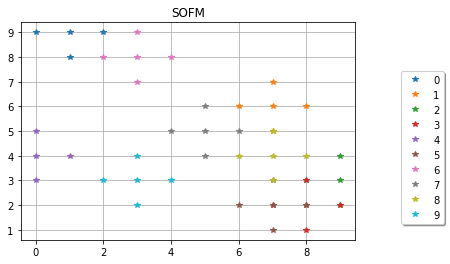

In [ ]:
if __name__ == '__main__':

    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()  
    train_images = train_images.reshape((60000, 28 * 28))
   
    train_images = train_images.astype('float32') / 255
    train_mean = train_images.mean()
    train_images -= train_mean
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype('float32') / 255
    test_mean = test_images.mean()
    test_images -= test_mean

    k = len(train_images[0])
#     print(k, train_images.shape)
    size_x = 10
    size_y = 10
    
    
#     np.random.seed(101)
    # Construyo el mapa
    mapa = []
    aux = []
    # np.random.seed(101)
    for i in range(size_x):
        for j in range(size_y):
            aux.append(0.1 * np.random.rand(k))
        mapa.append(np.array(aux).copy())
        aux.clear()

   # -------------------------------------------------------------------------
   # -                               SOFM                                    -
   # -------------------------------------------------------------------------     
        
    mapa_2 = train(train_images, mapa)
    
# Etiquetar los cluster ya generados por el SOFM
    
    x_ = [train_images[1],
          train_images[3],
          train_images[5],
          train_images[7],
          train_images[2],
          train_images[0],
          train_images[13],
          train_images[15],
          train_images[17],
          train_images[4]]
    C = []
    f = []
    p = []
    clase = {}
    for i,x in enumerate(x_):
      di = []
      mapa_di = []
      for n, mapa_n in enumerate(mapa_2):
          for m, mapa_n_m in enumerate(mapa_n):
              di.append(d(x, mapa_n_m))
          mapa_di.append(np.array(di).copy())
          di.clear()
      dist = np.array(mapa_di)
      d_min = dist.argmin()
      pos_min = np.unravel_index(d_min, dist.shape) # indice de la neurona ganadora
      g = np.array(pos_min)

      for n, mapa_n in enumerate(mapa_2):
          for m, mapa_n_m in enumerate(mapa_n):
            if h(np.array([n,m]),g,100000):

              C.append([n,m])
              f.append(n)
              p.append(m)
      plt.plot(f,p,'*',label=str(i))
      valor = clase.setdefault(str(i),copy(np.array(C)))  
      C.clear()
      f.clear()
      p.clear()
      
# Ploteo del mapa 

    plt.title('SOFM')
    plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
    plt.grid()
    plt.show()
#     print('el diccionario es', clase.keys(), clase.values())
  

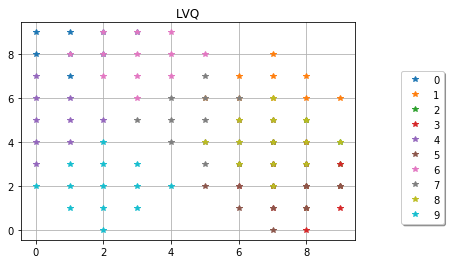

In [ ]:
   # -------------------------------------------------------------------------
   # -                            LVQ                                        -
   # -------------------------------------------------------------------------
    mapa_3 = lvq(train_images, train_labels, mapa_2, clase)

    
# Poteo de las clases en el lvq    
    x_ = [train_images[1],
        train_images[3],
        train_images[5],
        train_images[7],
        train_images[2],
        train_images[0],
        train_images[13],
        train_images[15],
        train_images[17],
        train_images[4]]
    C = []
    f = []
    p = []
    clase = {}
    for i,x in enumerate(x_):
      di = []
      mapa_di = []
      for n, mapa_n in enumerate(mapa_3):
          for m, mapa_n_m in enumerate(mapa_n):
              di.append(d(x, mapa_n_m))
          mapa_di.append(np.array(di).copy())
          di.clear()
      dist = np.array(mapa_di)
      pos_min = np.unravel_index(dist.argmin(), dist.shape) # indice de la neurona ganadora
      g = np.array(pos_min)

      for n, mapa_n in enumerate(mapa_3):
          for m, mapa_n_m in enumerate(mapa_n):
            if h(np.array([n,m]),g,26000):

              C.append([n,m])
              f.append(n)
              p.append(m)

      plt.plot(f,p,'*',label=str(i))
      valor = clase.setdefault(str(i),copy(np.array(C)))  
      C.clear()
      f.clear()
      p.clear()
    plt.title('LVQ')
    plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
    plt.grid()
    plt.show()
    

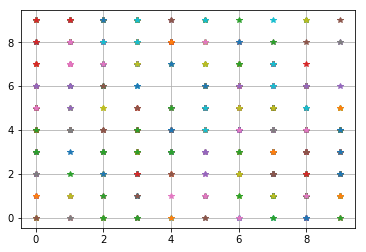

Numero de aciertos:  8788
Porcentaje de aciertos:  87.88
Numero de errores:  1212
Porcentaje de errores:  12.12


In [ ]:
   # -------------------------------------------------------------------------
   # -                                 TEST                                  -
   # -------------------------------------------------------------------------

num = 10000
x_ = test_images[:num]
y_ = test_labels[:num]
aciertos = 0
errores = 0
for index, x in enumerate(x_):
  di = []
  mapa_di = []
  for n, mapa_n in enumerate(mapa_3):
      for m, mapa_n_m in enumerate(mapa_n):
          di.append(d(x, mapa_n_m))
      mapa_di.append(np.array(di).copy())
      di.clear()
  dist = np.array(mapa_di)
  d_min = dist.argmin()
  pos_min = np.unravel_index(d_min, dist.shape) # indice de la neurona ganadora
  g = np.array(pos_min)
  
  
  flag = True
  for cl in clase[str(y_[index])]:
    if cl[0] == g[0] and cl[1] == g[1]:
      aciertos += 1
      flag = False
  if flag:
    errores += 1

print("Numero de aciertos: ", aciertos)
print('Porcentaje de aciertos: ', aciertos * 100 / num)
print('Numero de errores: ', errores)
print('Porcentaje de errores: ', errores *100 / num)